In [2]:
import os 
os.environ["KAGGLE_USERNAME"] = "fnffnfkffk"
os.environ["KAGGLE_KEY"] = "1aa5448abf263722504d6b3d3a5c2485"

In [3]:
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 3.48MB/s]


In [4]:
!ls

heart-failure-clinical-data.zip  sample_data


In [5]:
!unzip "*.zip"

Archive:  heart-failure-clinical-data.zip
  inflating: heart_failure_clinical_records_dataset.csv  


In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [9]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [10]:
df.info()  # null 값 있나 없나 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [11]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [12]:
import seaborn as sns

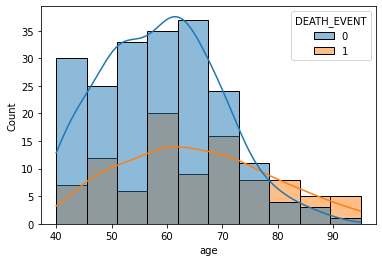

In [14]:
sns.histplot(x ='age', data=df, hue = "DEATH_EVENT", kde = True)

In [15]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

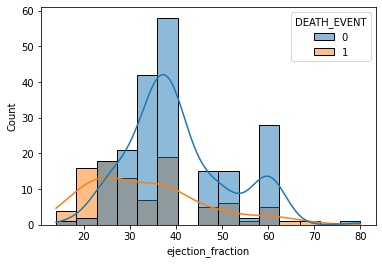

In [16]:
sns.histplot(x = 'ejection_fraction', data = df, hue = "DEATH_EVENT", kde = True)

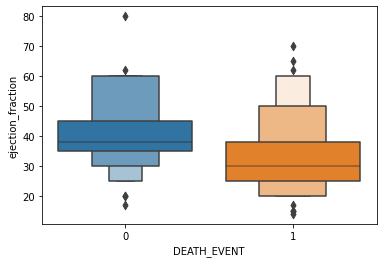

In [18]:
sns.boxenplot(x = "DEATH_EVENT", y = "ejection_fraction", data = df)

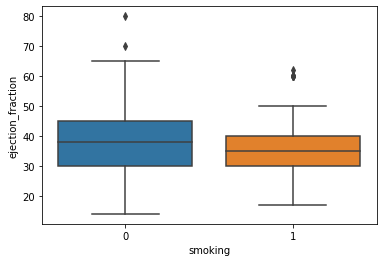

In [20]:
sns.boxplot(x = "smoking", y = "ejection_fraction", data = df)

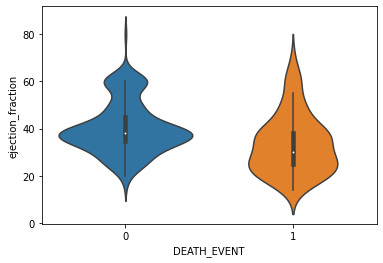

In [21]:
sns.violinplot(x = "DEATH_EVENT", y = "ejection_fraction", data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


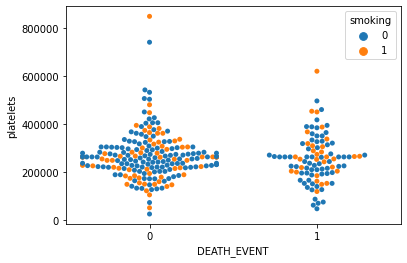

In [24]:
sns.swarmplot(x = "DEATH_EVENT", y = "platelets", hue = "smoking" ,data = df)

In [27]:
from sklearn.preprocessing import StandardScaler
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [31]:
#수치형 입력데이터, 범주형 입력데이터, 출력 데이터로 구분하기 (for 이진분류)
X_num = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium','time']]  #수치
X_cat = df[['anaemia','diabetes','high_blood_pressure','sex', 'smoking']]  #범주
y = df["DEATH_EVENT"]
print(X_num)

      age  creatinine_phosphokinase  ...  serum_sodium  time
0    75.0                       582  ...           130     4
1    55.0                      7861  ...           136     6
2    65.0                       146  ...           129     7
3    50.0                       111  ...           137     7
4    65.0                       160  ...           116     8
..    ...                       ...  ...           ...   ...
294  62.0                        61  ...           143   270
295  55.0                      1820  ...           139   271
296  45.0                      2060  ...           138   278
297  45.0                      2413  ...           140   280
298  50.0                       196  ...           136   285

[299 rows x 7 columns]


In [33]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)

In [34]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(X_scaled, y, test_size = 0.3, random_state = 1)

In [37]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter = 1000)
model_lr.fit(train_input, train_target)
print(model_lr.score(train_input, train_target))
print(model_lr.score(test_input, test_target))

0.8277511961722488
0.8222222222222222


In [39]:
from sklearn.metrics import  classification_report
pred = model_lr.predict(test_input)
print(classification_report(test_target,pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        64
           1       0.71      0.65      0.68        26

    accuracy                           0.82        90
   macro avg       0.79      0.77      0.78        90
weighted avg       0.82      0.82      0.82        90

